Comparing kmeans with 2 different heuristics

retrieving C:\Users\a770398\IO-SEA\io-sea-3.4-analytics\dataset_generation\dataset_generation\dataset_gysela\job_109567.csv
(3242, 5)


<AxesSubplot:>

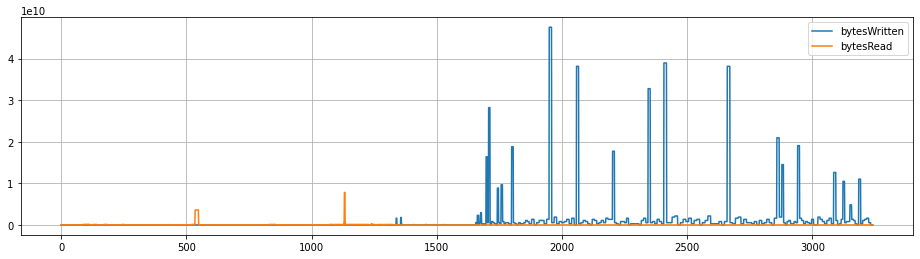

In [1]:
from utils import *
import pwlf
import ruptures as rpt

df = get_df_by_job_id(job_id=109567)
#df = get_df_by_job_id(job_id=93537)
print(df.shape)
df.plot(y=["bytesWritten", "bytesRead"], figsize=(16,4), sharex=True, grid=True, use_index=True)

# df.plot(y=["bytesWritten", "bytesRead"], figsize=(16,4), sharex=True, grid=True, use_index=True, logy=True)


breakpoints plotting


In [4]:
%matplotlib tk

signal = (df[["bytesWritten"]]).to_numpy()
breakpoints, labels = get_kmeans_breakpoints(signal, v0_threshold = 0.03, merge=True)
breakpoints2, labels2 = get_kmeans_original_breakpoints(signal)
#rpt.display(signal, breakpoints2, breakpoints)
#show_breakpoints(signal, breakpoints)
show_breakpoints(signal, breakpoints, breakpoints2=breakpoints2, labels=labels, labels2=labels2)
# p_signal = reconstruct_pwlf(signal, breakpoints)
# show_reconstruction(signal, p_signal)

n_clusters = 15
v0_weight = 0.0007625933258590361
labels = [0 0 0 ... 0 0 0]
n_clusters = 26
labels = [0 0 0 ... 0 0 0]


Random jobs

In [6]:
print(len(breakpoints2))
print(len(signal))

181
3242


In [17]:
# reconstruction

from utils import get_kmeans_breakpoints, get_kmeans_original_breakpoints, choose_random_job
#breakpoints = get_kmeans_breakpoints(signal, v0_threshold=0.05)
csv_file = choose_random_job()
print(csv_file)
df = pd.read_csv(csv_file, index_col=0)
signal = (df[["bytesWritten"]]).to_numpy()

breakpoints, labels = get_kmeans_breakpoints(signal, v0_threshold = 0.02, merge=False)
breakpoints2, labels2 = get_kmeans_original_breakpoints(signal)
#rpt.display(signal, breakpoints2, breakpoints)
#show_breakpoints(signal, breakpoints)
show_breakpoints(signal, breakpoints, breakpoints2=breakpoints2, labels=labels, labels2=labels2)

C:\Users\a770398\IO-SEA\io-sea-3.4-analytics\dataset_generation\dataset_generation\dataset_namd\job_4952.csv
n_clusters = 6
v0_weight = 0.012019046534831082
labels = [0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 2 4 0 3 3 1 0 0 1 1 3 3 1]
n_clusters = 3
labels = [0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 2 2 0 0 0 1 0 0 1 1 0 0 1]


In [16]:
v0_threshold = 0.05
v0_weight = 1
n_clusters = 2
while v0_weight > v0_threshold:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(signal)
    v0_indexes = np.where(kmeans.labels_==0, True, False)
    v0_weight = signal[v0_indexes].sum() / signal.sum()
    n_clusters += 1
    if n_clusters >= len(signal):
        # if n_clusters equals signal points, exit the loop
        break
    
ab = np.arange(len(signal))
print(f"{n_clusters = }")
print(f"{v0_weight = }")
# changes=x[np.insert(np.where(np.diff(kmeans.labels_)!=0, True, False), 0, False)]
# merge v1+ clusters together
print(kmeans.labels_)
print(type(kmeans.labels_))
labels = np.where(kmeans.labels_ > 0, 1, 0)
print(labels)
print(type(labels))

n_clusters = 14
v0_weight = 0.04266441221119654
[ 2  5  1  3  2  2  6  3  3 10  7  8  7 11  9  6  9  4  8  8 12  0  3  9
  0  7  1  5  6]
<class 'numpy.ndarray'>
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1]
<class 'numpy.ndarray'>


Specific job

In [14]:
from utils import get_df_by_job_id
df = get_df_by_job_id(job_id=108010)
signal = (df[["bytesWritten"]]).to_numpy()

breakpoints, labels = get_kmeans_breakpoints(signal, v0_threshold = 0.02, merge=False)
breakpoints2, labels2 = get_kmeans_original_breakpoints(signal)
#rpt.display(signal, breakpoints2, breakpoints)
#show_breakpoints(signal, breakpoints)
show_breakpoints(signal, breakpoints, breakpoints2=breakpoints2, labels=labels, labels2=labels2)

retrieving C:\Users\a770398\IO-SEA\io-sea-3.4-analytics\dataset_generation\dataset_generation\dataset_gysela\job_108010.csv
n_clusters = 62
v0_weight = 1.0711617999265065e-07
labels = [ 0  0  0 ... 26 26  0]
n_clusters = 2
labels = [0 0 0 ... 0 0 0]


In [10]:
from utils import get_df_by_job_id
df = get_df_by_job_id(job_id=4913) #53494
signal = (df[["bytesWritten"]]).to_numpy()

breakpoints = get_kmeans_breakpoints(signal, v0_threshold = 0.05)
print(breakpoints)
breakpoints2 = get_kmeans_original_breakpoints(signal)
print(breakpoints2)
#show_breakpoints(signal, breakpoints, breakpoints2=breakpoints2)
rpt.display(signal, breakpoints2, breakpoints)

retrieving C:\Users\a770398\IO-SEA\io-sea-3.4-analytics\dataset_generation\dataset_generation\dataset_namd\job_4913.csv
n_clusters = 10
v0_weight = 0.027902384277103592
[12, 13]
[11, 12, 14, 15, 18, 19, 21, 22, 23]


(<Figure size 1000x200 with 1 Axes>, [<AxesSubplot:>])

Let now fit the signal with rect curve

In [19]:
import numpy as np
import pwlf

x = df[["timestamp"]].to_numpy().flatten()
x0 = np.take(x, breakpoints, axis=0)
#x0 = np.array([min(x), ])
signal = (df[["bytesWritten"]]).to_numpy().flatten()
print(x.shape)
print(signal.shape)
print(x0.shape)
my_pwlf = pwlf.PiecewiseLinFit(x, signal, degree=0)
my_pwlf.fit_with_breaks(x0)
p_signal = my_pwlf.predict(x)

plt.rcParams["figure.figsize"] = (12, 5)
plt.plot(x, p_signal, x, signal)
plt.grid(True)


(28,)
(28,)
(11,)


Switching to signal processing (curve fitting)